# P1 Udacity Project: Stroop Effect - S.Jaeger submission

## Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

Psytoolkit.org [3] proposes below picture as an illustration:
![](http://www.psytoolkit.org/lessons/stroop.png)


## Assignment

**Question 1**: What is our independent variable? What is our dependent variable?

**Answer**: Our dependent variable is the time taken to name the ink colors in a list. Our independant variable is the type of the list of words and associated color used for a given task: This variable can only take two values, either "incongruent" or  "congruent" depending on the condition (list of words and their color matching or not) applied.
The stroop experiment is conducted to see the influence of this variable over the response time. 


**Question 2**: What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

**Answer**:Let us call X<sub>c</sub> the variable of the time taken by a given person answering the congruent test and X<sub>i</sub> the variable of the time taken by a given person answering the incongruent test. We can say that X<sub>c</sub> and X<sub>i</sub> are not totally independant in the context of this experiment as the same people are doing each test. Besides, nothing is said on the order in which they take the test, is it random or consistent ? For this reason it is even more relevant to consider X<sub>i</sub> and X<sub>c</sub> as dependant variables.
We are also not aware about the whole population parameters and just have <B>a pair</B> of dependant samples, one for each task.<BR>
For those reasons we consider doing a dependant sample t-test, also known as paired t-test, with following hypotheses: 
- H<sub>0</sub> or null hypothesis: Congruency has no effect on the stroop task results: \begin{equation}\mu_d = \mu_i
-\mu_c = 0\end{equation}
- H<sub>a</sub> or alternative hypothesis: Congruency has an effect on the stroop task results: \begin{equation}\mu_d = \mu_i -\mu_c \neq 0\end{equation}
 
<B>Note1:</B>$\mu$ represents the population mean response time, $\mu_i$, the population mean response time to the incongruent task condition, $\mu_c$ the population mean resonse time to the congruent task condition.  
<B>Note2:</B> We can have the intuition that incongruency may generally increase the time taken by people to achieve the stroop task, however, as we are not sure about that, we prefer to keep above mentioned alternative hypothesis and not doing any assumptions on the results. For this reason we will carry out a <B>two tailed</B> dependant sample t-test using: \begin{equation}\alpha = .05 \end{equation}.  

**Question 2.1**:Now it’s your chance to try out the Stroop task for yourself. Go to this link , which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.):

**Answer**: My time is <B>33.412s</B> for the congruant task & <B>45.981s</B> for the incongruant one. Almost 1.5 more time for the incongruant task than for the congruent one.

**Question 3 & 4**:Now, download this dataset which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.

Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

**Answer**: See below.

In [2]:
# import all necessary packages and functions.
import csv
import numpy as np
import pandas as pd
import math
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# file locations
file_in  = 'stroopdata.csv'

# Create a single dataframe to store all samples and differences
dataframe = pd.read_csv(file_in)

# Computing difference between samples
congruentSample = dataframe['Congruent']
incongruentSample = dataframe['Incongruent']

# Storing difference within main dataframe & checking for results
differenceSample = incongruentSample - congruentSample
dataframe.insert(2, "Difference", differenceSample)
dataframe.head()

,Congruent,Incongruent,Difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


In [3]:
dataframe.describe()

,Congruent,Incongruent,Difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


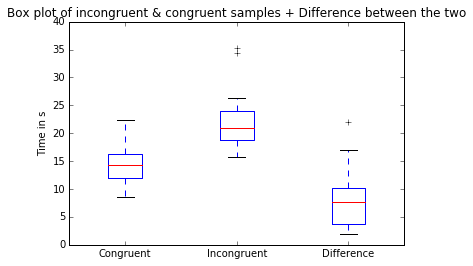

In [4]:
axes = dataframe.plot(title = "Box plot of incongruent & congruent samples + Difference between the two", kind="box")
axes = plt.ylabel("Time in s")

From those very first results, we can see that congruant mean (14) is much smaller than incongruent one (22) with both having a standard deviation within the same order of magnitude (3,5 vs 4,8). The boxplot makes it even more clear that generally speaking incongruent time is much higher than congruent one.

Note: We can see that two records from the Incongruant sample can be considered as outliers.

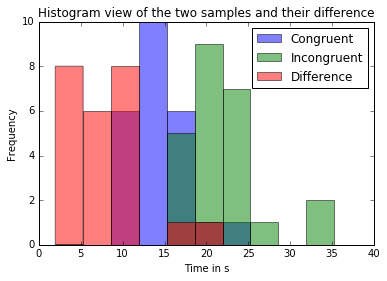

In [5]:
axes = dataframe.plot(title="Histogram view of the two samples and their difference",kind = "hist",alpha=0.5, bins = 10)
axes = plt.xlabel("Time in s")

This is also confirmed by the above histogram where we see that the green Incongruent distribution is clearly shifted to the right when compared to the blue Congruent distribution (people take more time saying the incongruent list of words). Let us check by doing the t-test whether this difference in time is <b>statistically significant</b> or not.

**Question 5**: Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [6]:
#Processing Difference sample t-stat 
Dtstat = differenceSample.mean()/(differenceSample.std()/math.sqrt(differenceSample.count()))
Dtstat

8.020706944109957

**Answer**:
As described before we do a two tailed dependant sample t-test with a confidence of 5%, $\alpha = .05 $ which leaves .0025 on each tail.<BR> 
There are n = 24 people reciting both lists, so Df = 23.<BR>
From the Udacity t-table [5], we retrieve t-criticals = +- 2.069.<BR>
As the t-stat of the difference equals 8.02 > 2.069, we reject the null hypothesis and conclude that the difference in time between the incongruent sample and the congruent one is statistically significant with a 95% confidence. In other words, as we expected, it takes significantly longer to say out loud the incongruent word list ($\mu_i=22$) than the congruent one ($\mu_c=14$).

**Question 6**: Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**Answer**: As stated by the Neuroscience for Kids [4], there are two theories that may explain the Stroop effect:
- Speed of Processing Theory: the interference occurs because words are read faster than colors are named.
- Selective Attention Theory: the interference occurs because naming colors requires more attention than reading words.

When doing myself the stroop test (applet), it made me remember about some silly game we used to play when we were kids: One of us was trying to do complex calculations or difficult counts whereas some others were saying out loud some random numbers totally out of context to distract/disturb the one counting. I find this kind of external stimuli designed to decrease performance somehow similar to the stroop task for incongruent words.

**Sources & References:**<BR><BR>
Original text assignment from udacity:<BR>
[1] GoogleDocs https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True<BR><BR>
Background information on Stroop Effect:<BR>
[2] Wikipedia https://en.wikipedia.org/wiki/Stroop_effect<BR>
[3] Psytoolkit.org http://www.psytoolkit.org/lessons/stroop.html<BR>
[4] Neuroscience For Kids https://faculty.washington.edu/chudler/words.html<BR>
[5] Udacity t-table https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg

**Revisions:**<BR>
    [1] - Friday the 25th of November, original submission <BR>
    [2] - Sunday the 27th of November, corrections after udacity review:<BR>
            Correction of the Independant variable.<BR>
            Note about $\mu $ being the population mean.<BR>
            Addition of "Time in s" mathplotlib axis on the graph, seen in very next udacity lesson.